In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
csv_path = "../test_results_methodology/final.csv"
df = pd.read_csv(csv_path)
df.head()

,Language,Threads,Tasks,Repetition,Energy_Joules,Peak_Memory_KB_RSS,Real_Time_Seconds
0,c_zig_cc,2,100,1,23.69,1080,0.22
1,c_zig_cc,2,100,2,23.07,1056,0.22
2,c_zig_cc,2,100,3,23.20,1076,0.21
3,c_zig_cc,2,100,4,22.77,1072,0.21
4,c_zig_cc,2,100,5,22.98,1072,0.22


In [3]:
numeric_cols = ["Energy_Joules", "Peak_Memory_KB_RSS", "Real_Time_Seconds"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.head()

,Language,Threads,Tasks,Repetition,Energy_Joules,Peak_Memory_KB_RSS,Real_Time_Seconds
0,c_zig_cc,2,100,1,23.69,1080,0.22
1,c_zig_cc,2,100,2,23.07,1056,0.22
2,c_zig_cc,2,100,3,23.20,1076,0.21
3,c_zig_cc,2,100,4,22.77,1072,0.21
4,c_zig_cc,2,100,5,22.98,1072,0.22


In [4]:
# ignore tests that have missing values in the average
def mean_ignore_zeros(series):
    non_zero = series[series != 0]
    return non_zero.mean() if len(non_zero) > 0 else 0

In [5]:
grouped = (
    df.groupby(["Language", "Threads", "Tasks"], as_index=False)
    .agg({
        "Energy_Joules": mean_ignore_zeros,
        "Peak_Memory_KB_RSS": mean_ignore_zeros,
        "Real_Time_Seconds": mean_ignore_zeros,
    })
)

grouped.head(70)

,Language,Threads,Tasks,Energy_Joules,Peak_Memory_KB_RSS,Real_Time_Seconds
0,c_gcc,2,100,501.176,1042.500000,4.754
1,c_gcc,2,1000,5039.997,1057.333333,47.625
2,c_gcc,2,10000,50527.116,1051.200000,476.727
3,c_gcc,4,100,289.138,1053.600000,2.384
4,c_gcc,4,1000,2933.395,1047.200000,23.805
...,...,...,...,...,...,...
65,rust,16,10000,38.490,1051.600000,0.251
66,rust,32,100,54.764,1054.000000,0.251
67,rust,32,1000,53.865,1040.400000,0.255
68,rust,32,10000,54.310,1048.000000,0.256


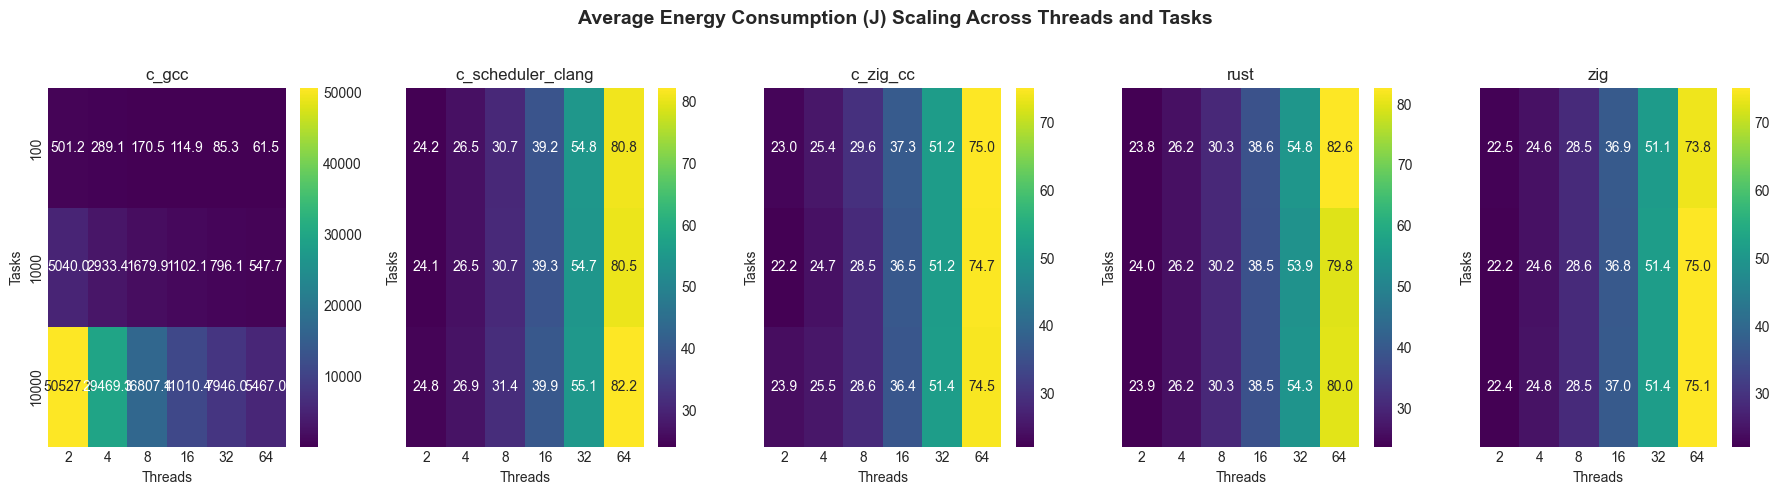

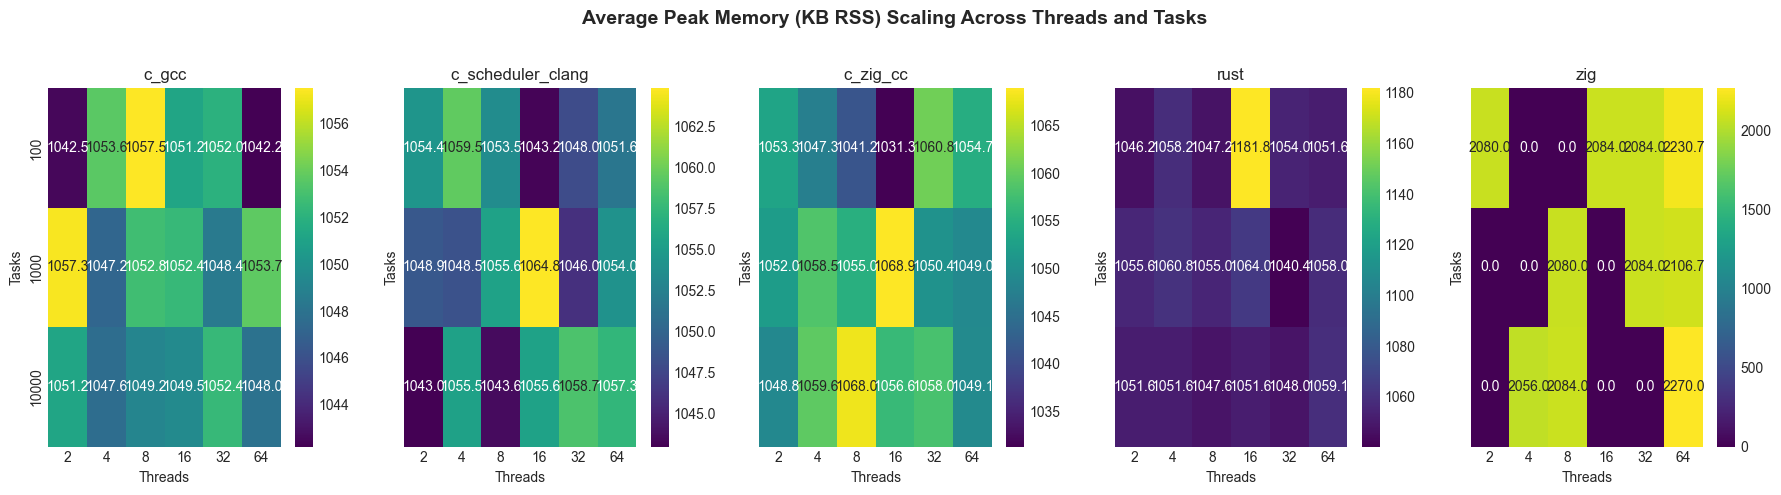

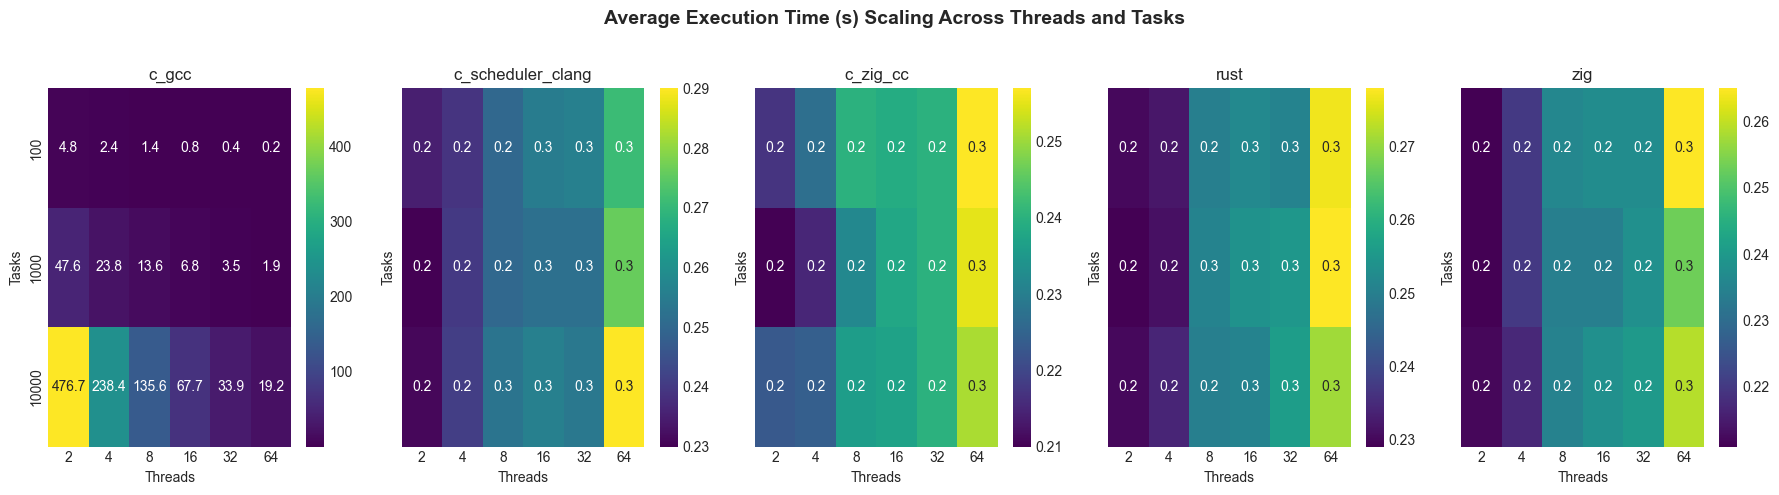

In [6]:
# --- Visualization setup ---
plt.style.use("seaborn-v0_8-darkgrid")
metrics = {
    "Energy_Joules": "Average Energy Consumption (J)",
    "Peak_Memory_KB_RSS": "Average Peak Memory (KB RSS)",
    "Real_Time_Seconds": "Average Execution Time (s)"
}

languages = sorted(grouped["Language"].unique())

# --- Plot heatmaps for each metric ---
for metric, title in metrics.items():
    fig, axes = plt.subplots(1, len(languages), figsize=(18, 5), sharey=True)
    fig.suptitle(f"{title} Scaling Across Threads and Tasks", fontsize=14, fontweight="bold")

    for ax, lang in zip(axes, languages):
        subset = grouped[grouped["Language"] == lang]
        pivot = subset.pivot(index="Tasks", columns="Threads", values=metric)
        sns.heatmap(
            pivot,
            annot=True,
            fmt=".1f",
            cmap="viridis",
            cbar=True,
            ax=ax,
        )
        ax.set_title(lang)
        ax.set_xlabel("Threads")
        ax.set_ylabel("Tasks")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


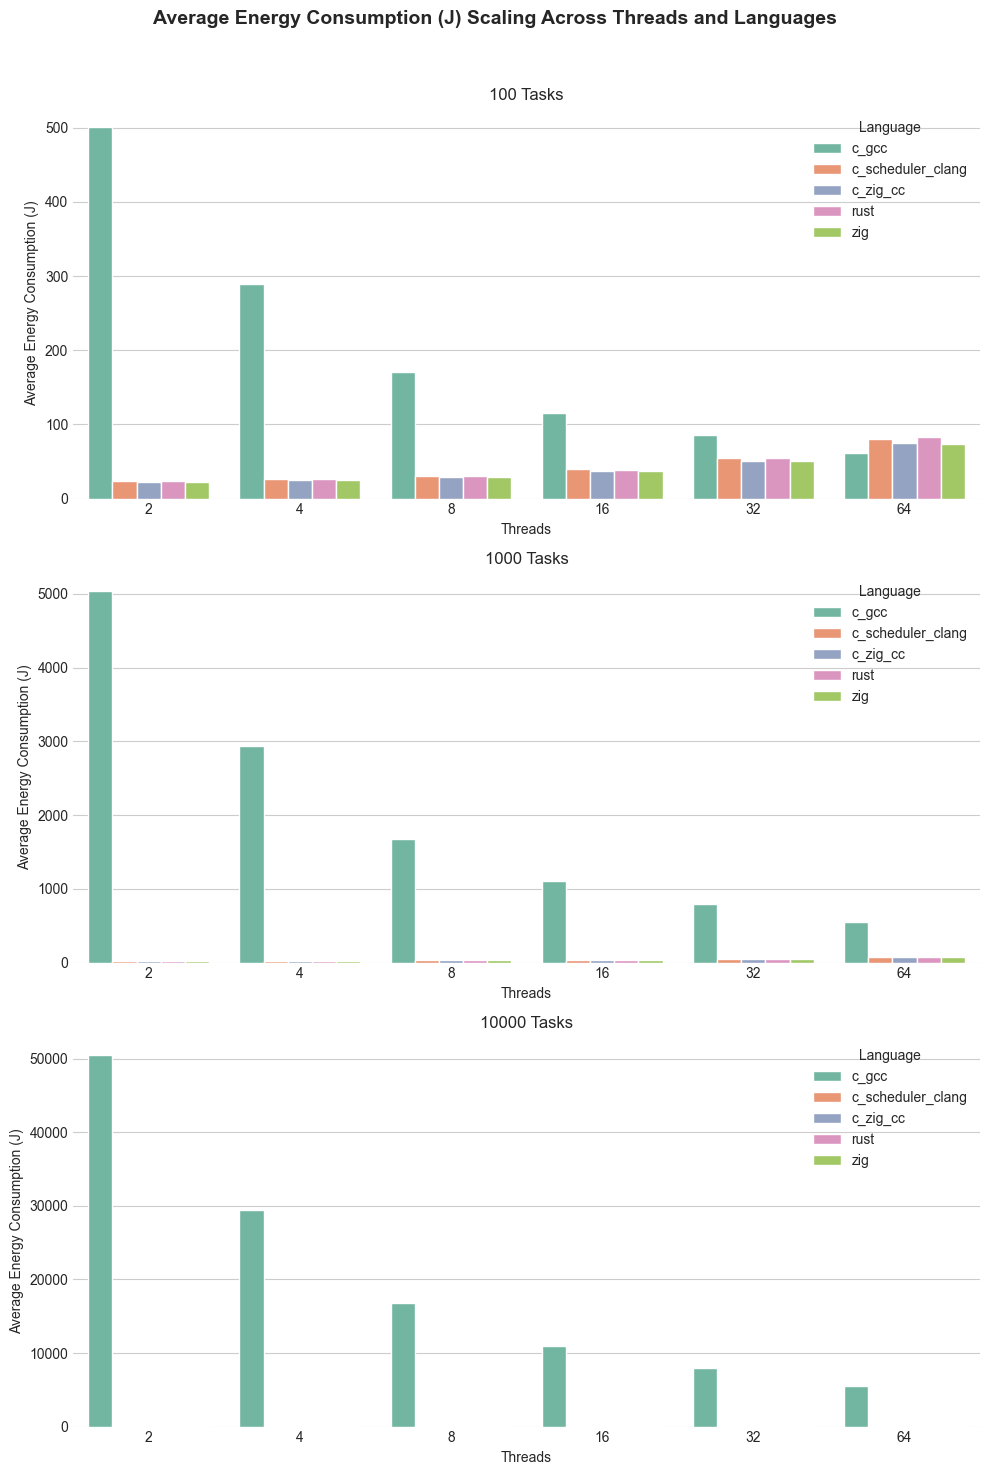

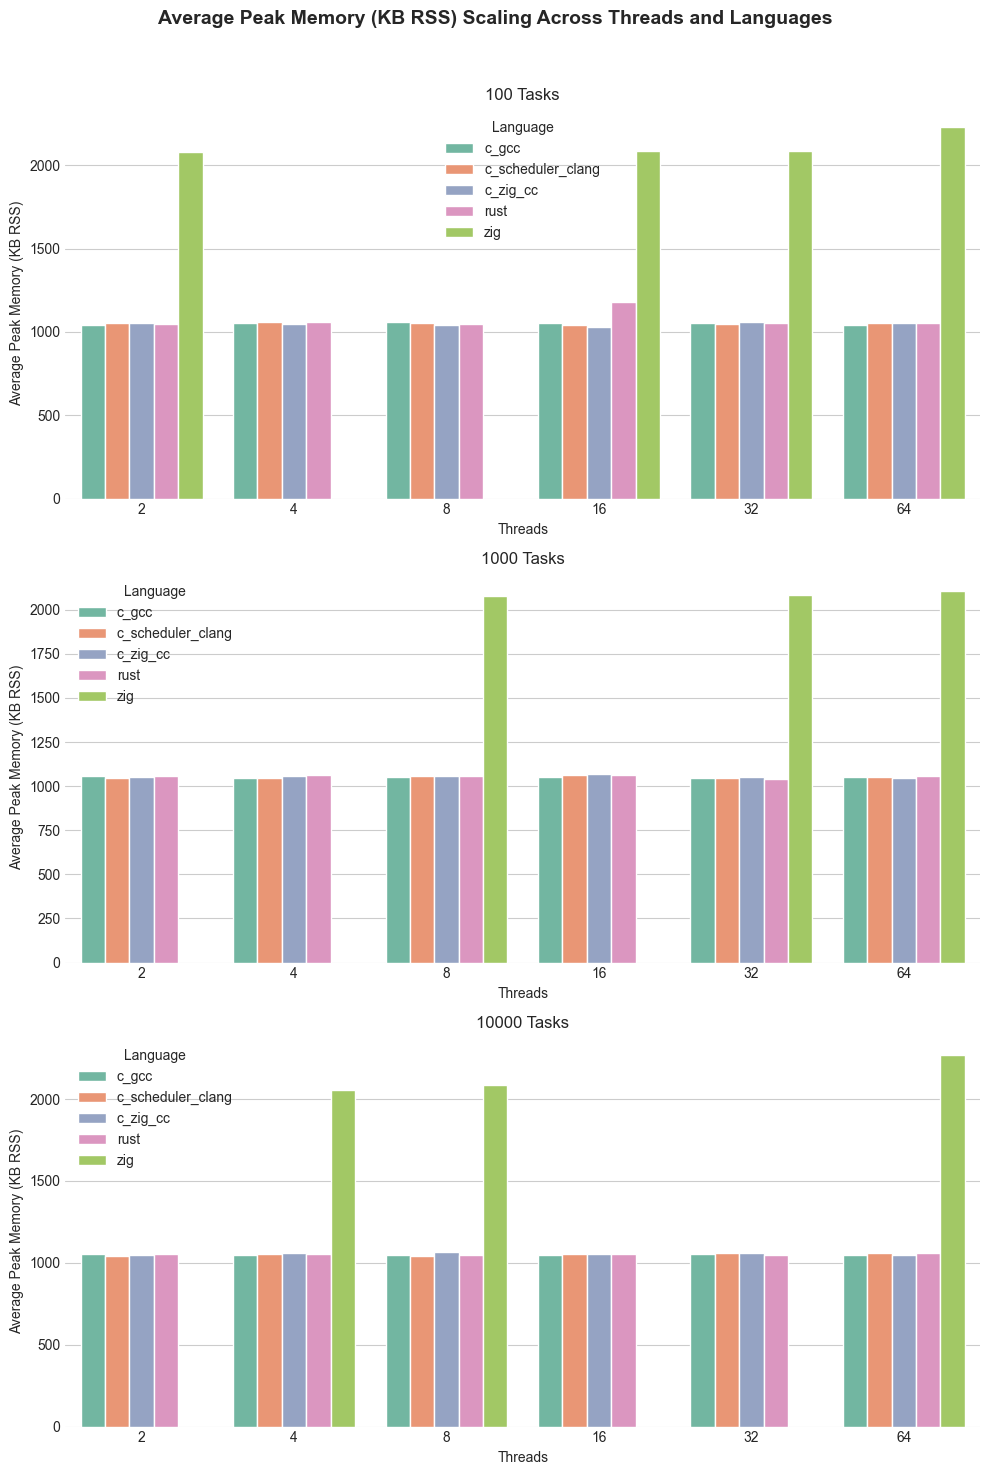

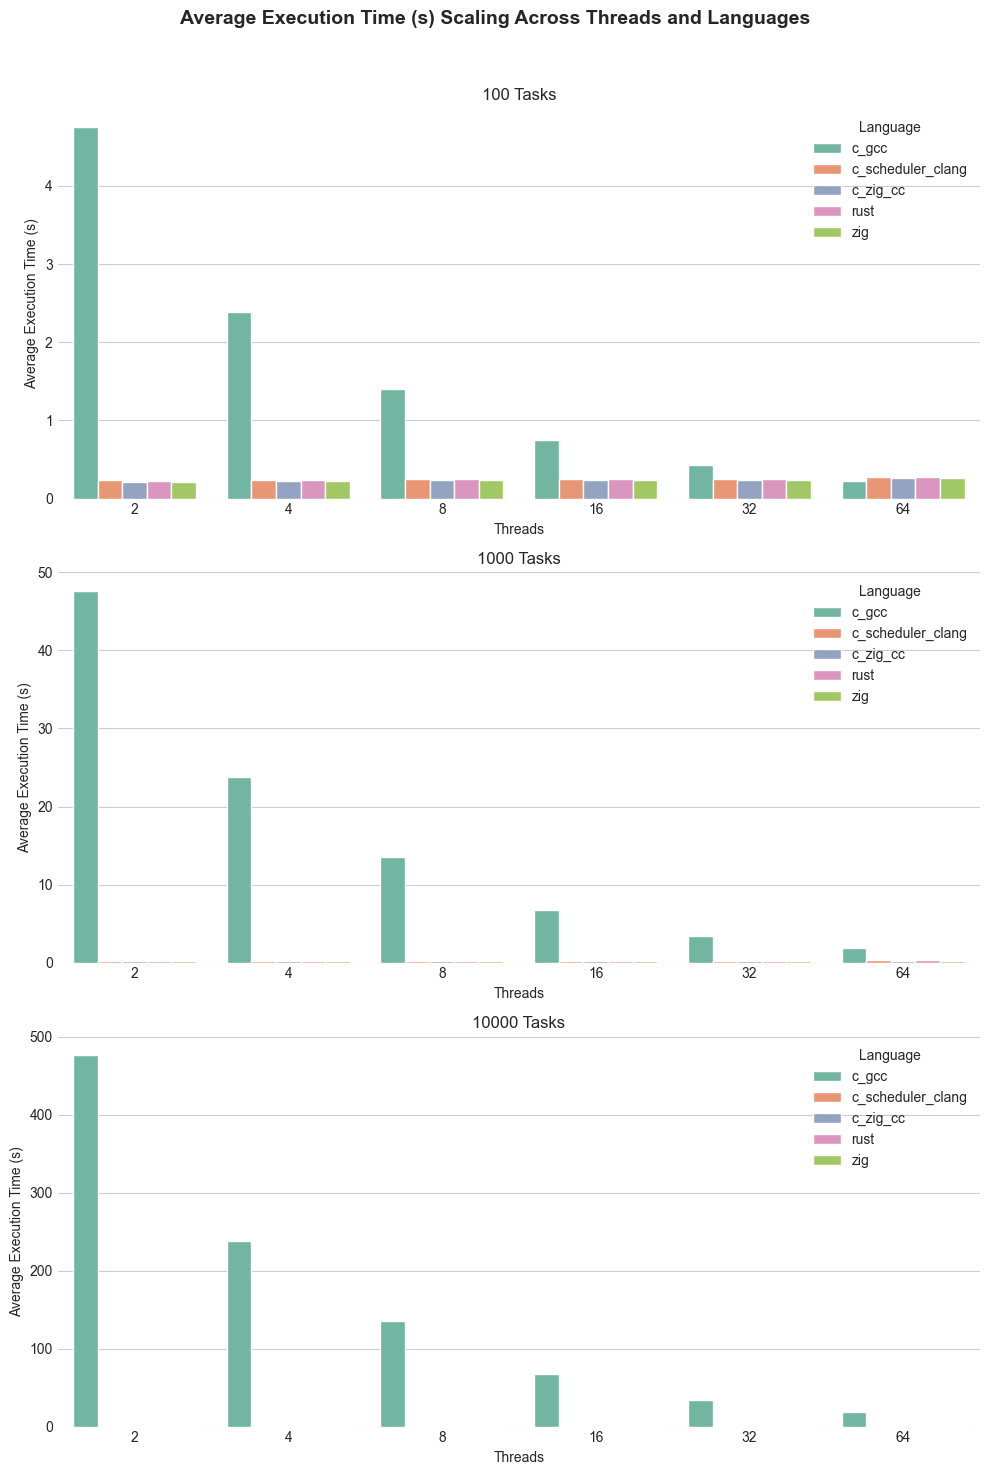

In [7]:
sns.set_style("whitegrid")
metrics = {
    "Energy_Joules": "Average Energy Consumption (J)",
    "Peak_Memory_KB_RSS": "Average Peak Memory (KB RSS)",
    "Real_Time_Seconds": "Average Execution Time (s)"
}

languages = sorted(grouped["Language"].unique())
palette = sns.color_palette("Set2", len(languages))

# --- Generate bar charts for each metric ---
for metric, ylabel in metrics.items():
    tasks_sorted = sorted(grouped["Tasks"].unique())
    fig, axes = plt.subplots(
        len(tasks_sorted), 1, figsize=(10, 5 * len(tasks_sorted)), sharey=False
    )
    fig.suptitle(f"{ylabel} Scaling Across Threads and Languages", fontsize=14, fontweight="bold")

    if len(tasks_sorted) == 1:
        axes = [axes]  # ensure iterable

    for ax, task in zip(axes, tasks_sorted):
        subset = grouped[grouped["Tasks"] == task]
        sns.barplot(
            data=subset,
            x="Threads",
            y=metric,
            hue="Language",
            palette=palette,
            ax=ax
        )

        ax.set_title(f"{task} Tasks")
        ax.set_xlabel("Threads")
        ax.set_ylabel(ylabel)
        ax.legend(title="Language", loc="best")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


In [ ]:
# we drop gcc because it is bad

In [14]:
grouped = grouped[grouped['Language'] != 'c_gcc']
grouped = grouped.reset_index(drop=True)

In [15]:
languages = sorted(grouped["Language"].unique())
languages

['c_scheduler_clang', 'c_zig_cc', 'rust', 'zig']

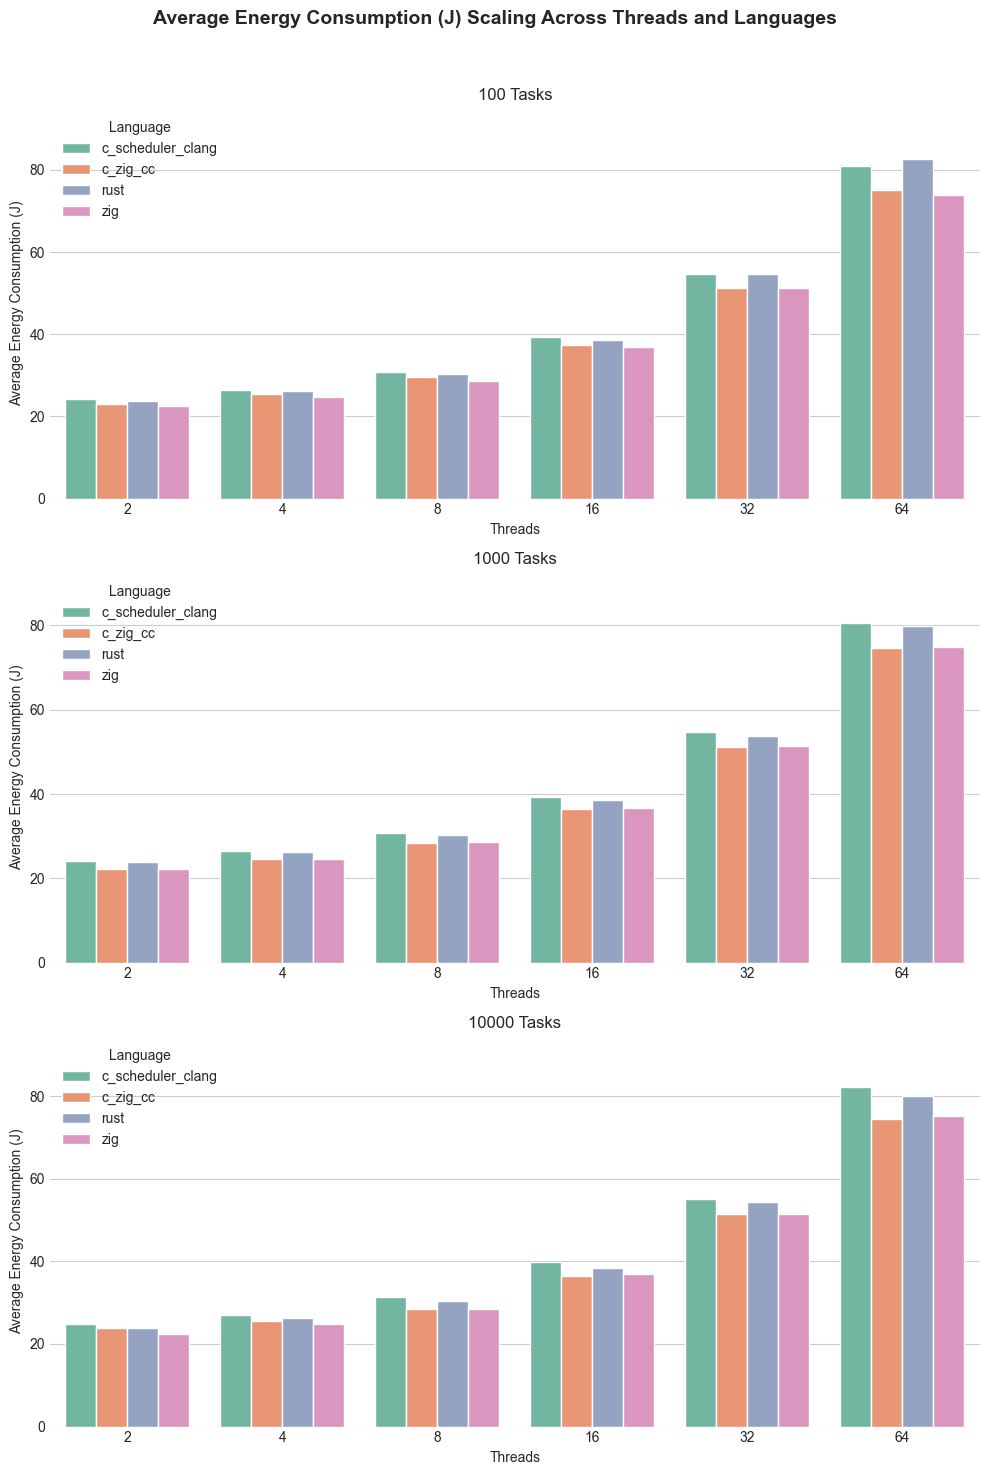

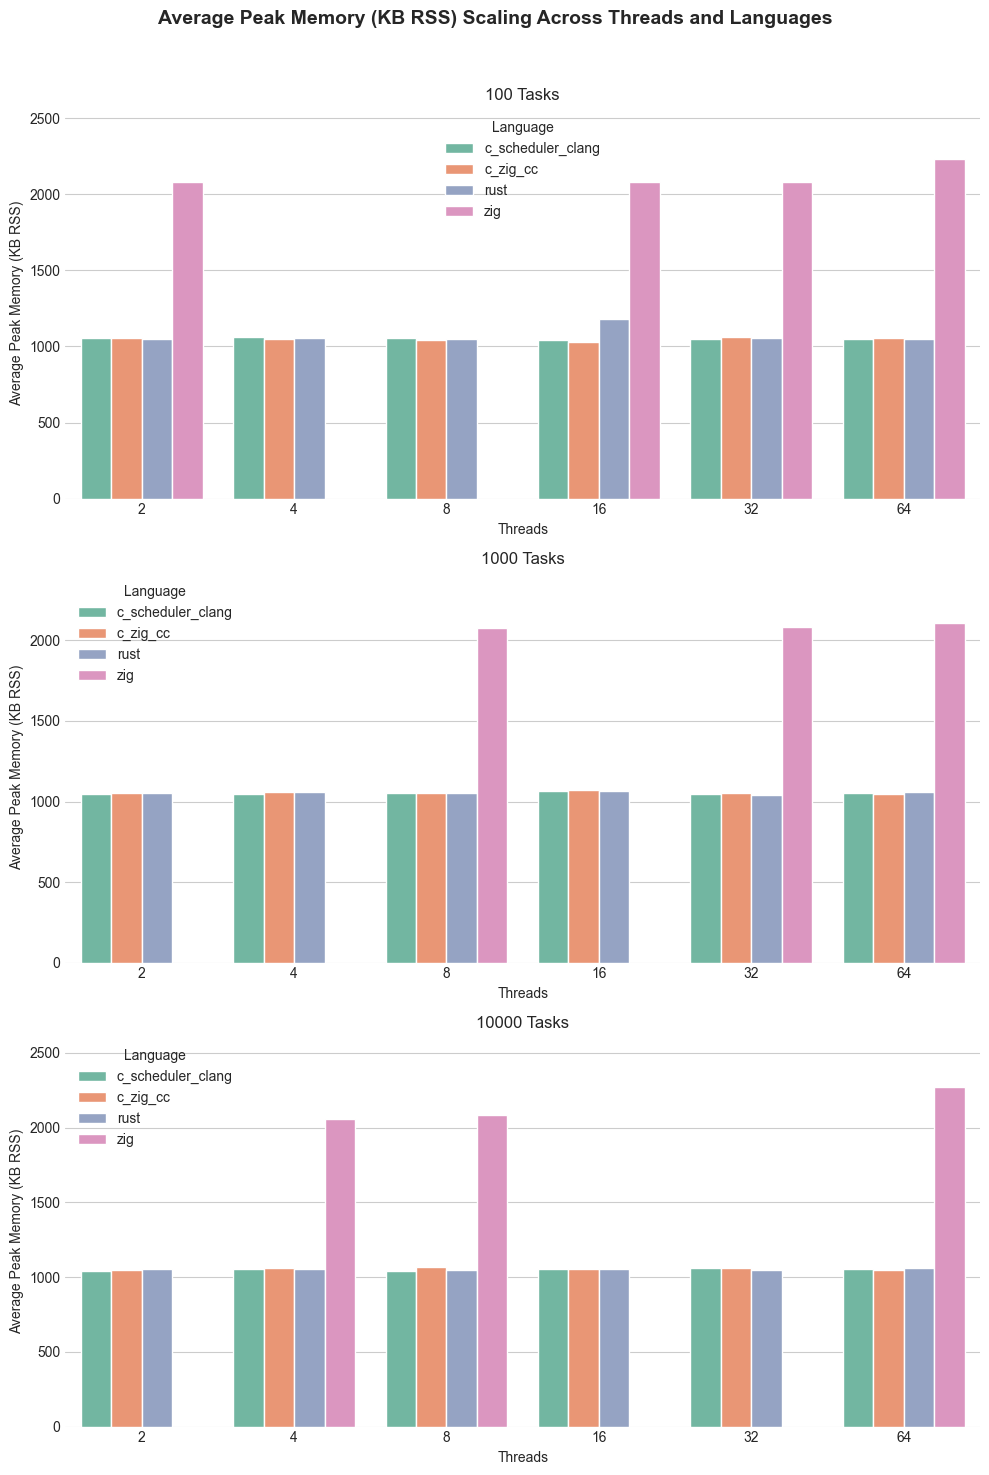

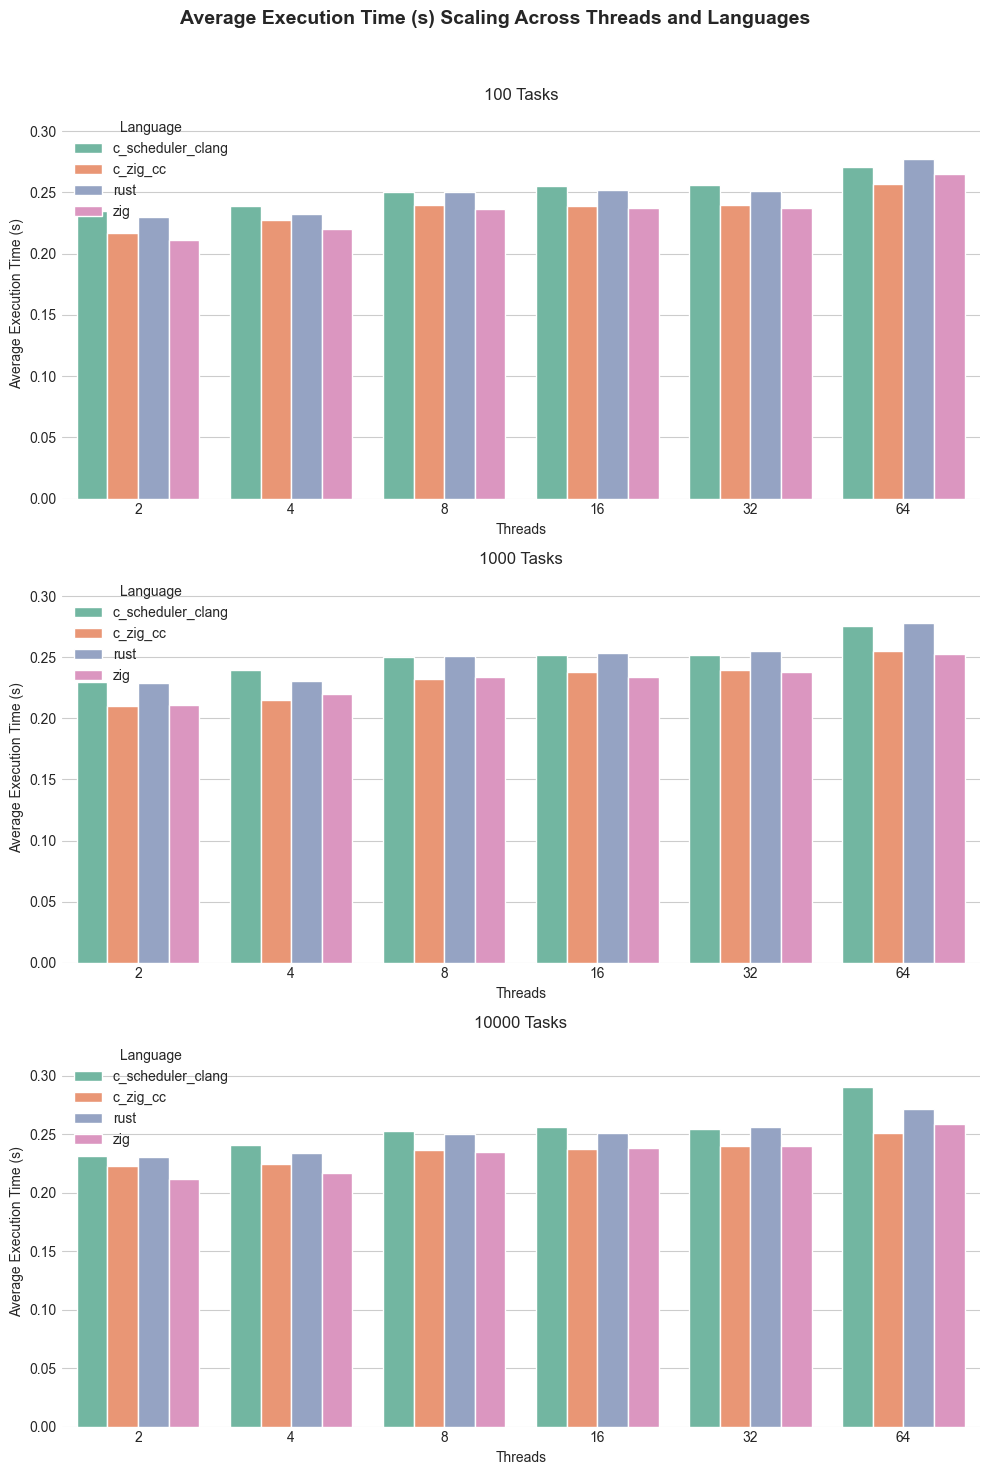

In [17]:
sns.set_style("whitegrid")
metrics = {
    "Energy_Joules": "Average Energy Consumption (J)",
    "Peak_Memory_KB_RSS": "Average Peak Memory (KB RSS)",
    "Real_Time_Seconds": "Average Execution Time (s)"
}

palette = sns.color_palette("Set2", len(languages))

# --- Generate bar charts for each metric ---
for metric, ylabel in metrics.items():
    tasks_sorted = sorted(grouped["Tasks"].unique())
    fig, axes = plt.subplots(
        len(tasks_sorted), 1, figsize=(10, 5 * len(tasks_sorted)), sharey=False
    )
    fig.suptitle(f"{ylabel} Scaling Across Threads and Languages", fontsize=14, fontweight="bold")

    if len(tasks_sorted) == 1:
        axes = [axes]  # ensure iterable

    for ax, task in zip(axes, tasks_sorted):
        subset = grouped[grouped["Tasks"] == task]
        sns.barplot(
            data=subset,
            x="Threads",
            y=metric,
            hue="Language",
            palette=palette,
            ax=ax
        )

        ax.set_title(f"{task} Tasks")
        ax.set_xlabel("Threads")
        ax.set_ylabel(ylabel)
        ax.legend(title="Language", loc="best")

        # --- Add vertical space above the tallest bar ---
        ymax = subset[metric].max()
        ax.set_ylim(0, ymax * 1.15)  # 15% headroom (adjust factor as needed)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()



In [34]:
grouped[grouped['Language']=='zig']

,Language,Threads,Tasks,Energy_Joules,Peak_Memory_KB_RSS,Real_Time_Seconds
54,zig,2,100,22.483,2080.000000,0.211
55,zig,2,1000,22.214,0.000000,0.211
56,zig,2,10000,22.362,0.000000,0.212
57,zig,4,100,24.629,0.000000,0.220
58,zig,4,1000,24.630,0.000000,0.220
59,zig,4,10000,24.793,2056.000000,0.217
60,zig,8,100,28.499,0.000000,0.236
61,zig,8,1000,28.612,2080.000000,0.234
62,zig,8,10000,28.539,2084.000000,0.235
63,zig,16,100,36.916,2084.000000,0.237


In [24]:
grouped['Language'].unique()

array(['c_scheduler_clang', 'c_zig_cc', 'rust', 'zig'], dtype=object)

In [35]:
metrics = {
    "Energy_Joules": "Energy Consumption",
    "Peak_Memory_KB_RSS": "Peak Memory",
    "Real_Time_Seconds": "Execution Time"
}

best_languages = {}

for metric, name in metrics.items():
    diffs = []
    for task in grouped['Tasks'].unique():
        for thread in grouped['Threads'].unique():
            subset = grouped[(grouped['Tasks'] == task) & (grouped['Threads'] == thread)].copy()
            
            # Replace 0 with NaN so we can decide how to treat them
            subset[metric] = subset[metric].replace(0, pd.NA)
            subset = subset.dropna(subset=[metric])
            if subset.empty:
                continue
            
            best_value = subset[metric].min()
            
            for _, row in subset.iterrows():
                diffs.append({
                    "Language": row['Language'],
                    "Diff": row[metric] - best_value
                })
    
    diff_df = pd.DataFrame(diffs)
    avg_diff = diff_df.groupby('Language')['Diff'].mean()
    best_language = avg_diff.idxmin()
    best_value = avg_diff.min()
    
    best_languages[name] = (best_language, best_value)

# Display results
for metric_name, (language, value) in best_languages.items():
    print(f"Best {metric_name}: {language} with average difference {value:.6f}")




Best Energy Consumption: zig with average difference 0.119778
Best Peak Memory: c_scheduler_clang with average difference 4.623545
Best Execution Time: zig with average difference 0.001389


In [39]:
import pandas as pd

# Metrics to evaluate
metrics = {
    "Energy_Joules": "Energy Consumption",
    "Peak_Memory_KB_RSS": "Peak Memory",
    "Real_Time_Seconds": "Execution Time"
}

best_languages = {}

for metric, name in metrics.items():
    diffs = []
    for task in grouped['Tasks'].unique():
        for thread in grouped['Threads'].unique():
            subset = grouped[(grouped['Tasks'] == task) & (grouped['Threads'] == thread)].copy()
            subset[metric] = subset[metric].replace(0, pd.NA)  # ignore zeros
            subset = subset.dropna(subset=[metric])
            if subset.empty:
                continue

            best_value = subset[metric].min()
            
            for _, row in subset.iterrows():
                rel_diff = (row[metric] - best_value) / best_value * 100  # percentage
                diffs.append({"Language": row['Language'], "RelDiff": rel_diff})

    diff_df = pd.DataFrame(diffs)
    avg_diff = diff_df.groupby('Language')['RelDiff'].mean().sort_values()

    best_language = avg_diff.index[0]
    second_best_language = avg_diff.index[1] if len(avg_diff) > 1 else None
    worst_language = avg_diff.index[-1]

    best_value = avg_diff.iloc[0]
    second_best_value = avg_diff.iloc[1] if len(avg_diff) > 1 else None
    worst_value = avg_diff.iloc[-1]

    # Difference from best to second best and worst
    diff_best_second = second_best_value - best_value if second_best_value is not None else None
    diff_best_worst = worst_value - best_value

    best_languages[name] = {
        "Best Language": best_language,
        "Avg % Above Best": best_value,
        "Second Best": second_best_language,
        "Diff to Best (%)": diff_best_second,
        "Worst Language": worst_language,
        "Diff Worst to Best (%)": diff_best_worst
    }

# Display nicely
summary_df = pd.DataFrame(best_languages).T
print(summary_df)

                        Best Language Avg % Above Best Second Best  \
Energy Consumption                zig         0.256103    c_zig_cc   
Peak Memory         c_scheduler_clang         0.442654    c_zig_cc   
Execution Time                    zig         0.576993    c_zig_cc   

                   Diff to Best (%)     Worst Language Diff Worst to Best (%)  
Energy Consumption         0.983862  c_scheduler_clang               8.008575  
Peak Memory                0.110113                zig             101.730815  
Execution Time             0.645802  c_scheduler_clang               8.070117  


In [38]:
tasks_10k = 10000
subset_10k = grouped[grouped['Tasks'] == tasks_10k].copy()
subset_10k.replace({0: pd.NA}, inplace=True)  # ignore zeros

best_worst_10k = []

for metric, name in metrics.items():
    df_metric = subset_10k.dropna(subset=[metric])
    grouped_metric = df_metric.groupby('Language')[metric]
    
    best_value = grouped_metric.min()
    worst_value = grouped_metric.max()
    
    best_worst_10k.append(pd.DataFrame({
        "Metric": name,
        "Language": best_value.index,
        "Best Value": best_value.values,
        "Worst Value": worst_value.values
    }))

best_worst_10k_df = pd.concat(best_worst_10k, ignore_index=True)
print("at 10k tasks")
print(best_worst_10k_df)


at 10k tasks
                Metric           Language Best Value  Worst Value
0   Energy Consumption  c_scheduler_clang     24.791       82.154
1   Energy Consumption           c_zig_cc     23.922       74.478
2   Energy Consumption               rust     23.871       80.013
3   Energy Consumption                zig     22.362       75.078
4          Peak Memory  c_scheduler_clang     1043.0  1058.666667
5          Peak Memory           c_zig_cc     1048.8       1068.0
6          Peak Memory               rust     1047.6  1059.111111
7          Peak Memory                zig     2056.0       2270.0
8       Execution Time  c_scheduler_clang      0.231         0.29
9       Execution Time           c_zig_cc      0.223        0.251
10      Execution Time               rust       0.23        0.271
11      Execution Time                zig      0.212        0.259
